# DATA ENGINEERING PIPELINE IN GOOGLE CLOUD USING MAGE FOR NYC YELLOW CAB DATA ANALYSIS

##### DATA SOURCE: "https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page" (Jan-Mar 2023 data (9.3M rows, 20 columns))
##### DATA DICTIONARY INFO: "https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf"
### NOTE: For this project's efficient completion, 100,000 sample rows are selected randomly in order to facilitate completion in the Google Cloud VM

### LOAD DATA

In [2]:
import pandas as pd
import os

#### Combine CSV Files and Sample 100,000 rows from the Data

In [28]:
fname = 'NYC_Cab_100K.csv'

parquet_dir = 'data'

if not os.path.exists(fname):
    # List all Parquet files in the directory
    parquet_files = [f for f in os.listdir(parquet_dir) if f.endswith(".parquet")]

    # Initialize an empty dataframe to store the combined data
    combined_data = [] # pd.DataFrame()

    # Loop through each CSV file and append its data to the combined data
    for parquet_file in parquet_files:
        parquet_path = os.path.join(parquet_dir, parquet_file)
        data = pd.read_parquet(parquet_path)
        #combined_data = 
        combined_data.append(data)
    combined_data = pd.concat(combined_data)
    
    #Removing Null Value rows
    combined_data = combined_data.dropna(subset=['passenger_count', 'RatecodeID', 'store_and_fwd_flag'])
    print(combined_data.shape)


(9148308, 20)


In [29]:
combined_data_100K = combined_data.sample(n=100000, random_state=42)

# Write the sampled data to a new CSV file
combined_data_100K.to_csv(fname)

In [54]:
data = pd.read_csv(fname, low_memory=False)

del data['Unnamed: 0']
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-03-21 16:21:01,2023-03-21 16:22:41,3.0,0.03,1.0,N,141,141,3,-3.7,-2.5,-0.5,0.00,0.0,-1.0,-10.20,-2.5,NaN,0.0
1,1,2023-02-21 22:17:15,2023-02-21 22:27:57,2.0,3.00,1.0,N,162,249,1,14.9,3.5,0.5,2.99,0.0,1.0,22.89,2.5,NaN,0.0
2,1,2023-03-10 11:52:28,2023-03-10 12:04:05,1.0,1.20,1.0,N,79,164,1,10.7,2.5,0.5,3.70,0.0,1.0,18.40,2.5,NaN,0.0
3,2,2023-02-22 19:47:32,2023-02-22 19:57:04,3.0,0.92,1.0,N,186,107,1,10.0,2.5,0.5,2.08,0.0,1.0,18.58,2.5,NaN,0.0
4,2,2023-03-31 22:04:20,2023-03-31 22:16:06,1.0,4.55,1.0,N,239,244,1,21.2,1.0,0.5,6.55,0.0,1.0,32.75,2.5,NaN,0.0


In [31]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

data = data.drop_duplicates().reset_index(drop=True)
data['trip_id'] = data.index
data.index = data['trip_id']

# del data['trip_id']
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee,trip_id
trip_id,,,,,,,,,,,,,,,,,,,,,
0,2,2023-03-21 16:21:01,2023-03-21 16:22:41,3.0,0.03,1.0,N,141,141,3,...,-2.5,-0.5,0.00,0.0,-1.0,-10.20,-2.5,NaN,0.0,0
1,1,2023-02-21 22:17:15,2023-02-21 22:27:57,2.0,3.00,1.0,N,162,249,1,...,3.5,0.5,2.99,0.0,1.0,22.89,2.5,NaN,0.0,1
2,1,2023-03-10 11:52:28,2023-03-10 12:04:05,1.0,1.20,1.0,N,79,164,1,...,2.5,0.5,3.70,0.0,1.0,18.40,2.5,NaN,0.0,2
3,2,2023-02-22 19:47:32,2023-02-22 19:57:04,3.0,0.92,1.0,N,186,107,1,...,2.5,0.5,2.08,0.0,1.0,18.58,2.5,NaN,0.0,3
4,2,2023-03-31 22:04:20,2023-03-31 22:16:06,1.0,4.55,1.0,N,239,244,1,...,1.0,0.5,6.55,0.0,1.0,32.75,2.5,NaN,0.0,4


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  int64         
 1   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  float64       
 4   trip_distance          100000 non-null  float64       
 5   RatecodeID             100000 non-null  float64       
 6   store_and_fwd_flag     100000 non-null  object        
 7   PULocationID           100000 non-null  int64         
 8   DOLocationID           100000 non-null  int64         
 9   payment_type           100000 non-null  int64         
 10  fare_amount            100000 non-null  float64       
 11  extra                  100000 non-null  float64       
 12  mta_tax                100000 non-null  float64   

## DIMENSION MODELLING

### DIMENSION TABLES

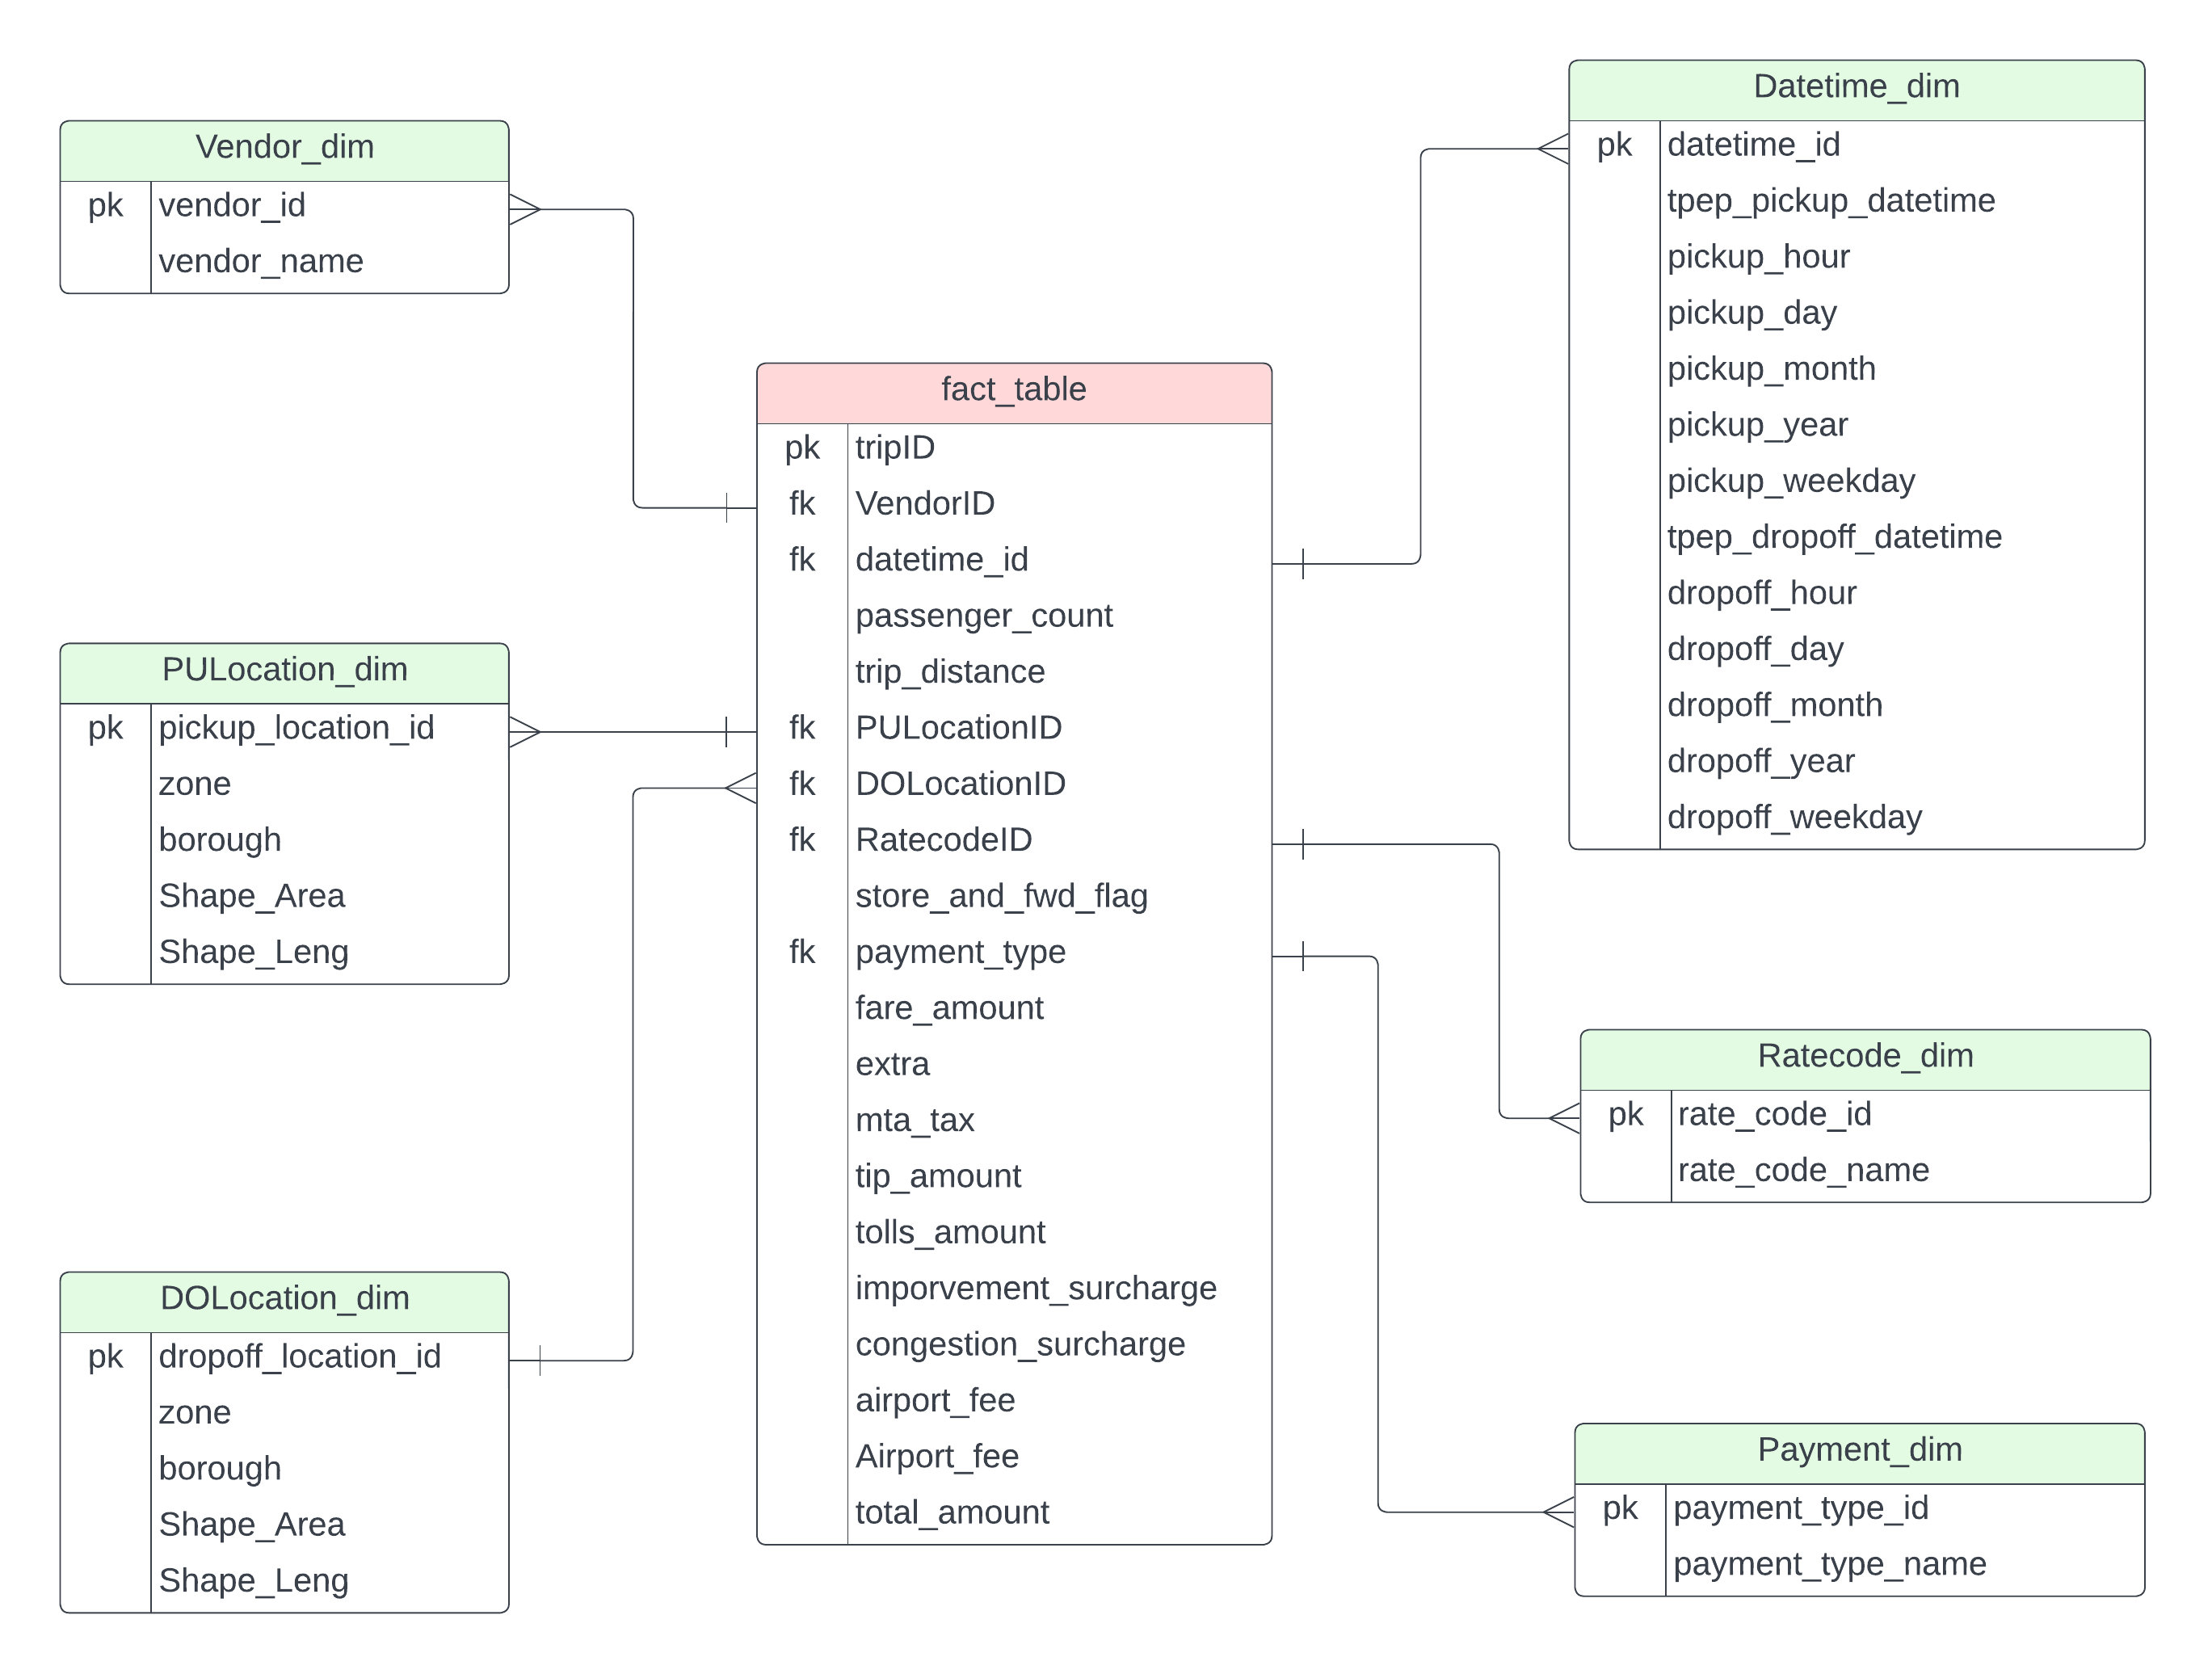

In [33]:
from PIL import Image
Image.open('DimensionModelling_NYCCab.png')

#### Dimension Table 1: Vendor_dim

In [34]:
vendor_code_name = {
    1:"Creative Mobile Technologies, LLC",
    2:"VeriFone Inc."
}

Vendor_dim = data[['VendorID']].drop_duplicates().reset_index(drop=True)
Vendor_dim = Vendor_dim.rename(columns={'VendorID':'vendor_id'})
# Vendor_dim['vendor_id'] = Vendor_dim.index
Vendor_dim['vendor_name'] = Vendor_dim['vendor_id'].map(vendor_code_name)
# Vendor_dim = Vendor_dim[['vendor_id','VendorID','vendor_name']]

Vendor_dim.set_index('vendor_id', inplace=True)
Vendor_dim = Vendor_dim.dropna()
Vendor_dim

,vendor_name
vendor_id,
2,VeriFone Inc.
1,"Creative Mobile Technologies, LLC"


#### Dimension Table 2: Datetime_dim

##### Pickup

In [35]:
Datetime_dim = data[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].reset_index(drop=True)

Datetime_dim['pickup_hour'] = Datetime_dim['tpep_pickup_datetime'].dt.hour
Datetime_dim['pickup_day'] = Datetime_dim['tpep_pickup_datetime'].dt.hour
Datetime_dim['pickup_month'] = Datetime_dim['tpep_pickup_datetime'].dt.month
Datetime_dim['pickup_year'] = Datetime_dim['tpep_pickup_datetime'].dt.year
Datetime_dim['pickup_weekday'] = Datetime_dim['tpep_pickup_datetime'].dt.weekday

Datetime_dim.head()



,tpep_pickup_datetime,tpep_dropoff_datetime,pickup_hour,pickup_day,pickup_month,pickup_year,pickup_weekday
0,2023-03-21 16:21:01,2023-03-21 16:22:41,16,16,3,2023,1
1,2023-02-21 22:17:15,2023-02-21 22:27:57,22,22,2,2023,1
2,2023-03-10 11:52:28,2023-03-10 12:04:05,11,11,3,2023,4
3,2023-02-22 19:47:32,2023-02-22 19:57:04,19,19,2,2023,2
4,2023-03-31 22:04:20,2023-03-31 22:16:06,22,22,3,2023,4


##### Dropoff

In [36]:
Datetime_dim['dropoff_hour'] = Datetime_dim['tpep_dropoff_datetime'].dt.hour
Datetime_dim['dropoff_day'] = Datetime_dim['tpep_dropoff_datetime'].dt.hour
Datetime_dim['dropoff_month'] = Datetime_dim['tpep_dropoff_datetime'].dt.month
Datetime_dim['dropoff_year'] = Datetime_dim['tpep_dropoff_datetime'].dt.year
Datetime_dim['dropoff_weekday'] = Datetime_dim['tpep_dropoff_datetime'].dt.weekday

Datetime_dim['datetime_id'] = Datetime_dim.index
Datetime_dim.index = Datetime_dim['datetime_id']
# Datetime_dim = Datetime_dim.set_index('datetime_id', inplace=False)



In [37]:
Datetime_dim.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,pickup_hour,pickup_day,pickup_month,pickup_year,pickup_weekday,dropoff_hour,dropoff_day,dropoff_month,dropoff_year,dropoff_weekday,datetime_id
datetime_id,,,,,,,,,,,,,
0,2023-03-21 16:21:01,2023-03-21 16:22:41,16,16,3,2023,1,16,16,3,2023,1,0
1,2023-02-21 22:17:15,2023-02-21 22:27:57,22,22,2,2023,1,22,22,2,2023,1,1
2,2023-03-10 11:52:28,2023-03-10 12:04:05,11,11,3,2023,4,12,12,3,2023,4,2
3,2023-02-22 19:47:32,2023-02-22 19:57:04,19,19,2,2023,2,19,19,2,2023,2,3
4,2023-03-31 22:04:20,2023-03-31 22:16:06,22,22,3,2023,4,22,22,3,2023,4,4


#### Dimension Table 3: PULocation_dim

In [38]:
tlc = pd.read_csv('taxi_zones.csv')
tlc.columns

PULocation_dim = tlc[['LocationID', 'zone', 'borough', 'Shape_Area', 'Shape_Leng']].drop_duplicates().reset_index(drop=True)
PULocation_dim = PULocation_dim.rename(columns={'LocationID':'pickup_location_id'})
# PULocation_dim['pickup_location_id'] = PULocation_dim.index
PULocation_dim.set_index('pickup_location_id', inplace=True)

PULocation_dim.head()

,zone,borough,Shape_Area,Shape_Leng
pickup_location_id,,,,
1,Newark Airport,EWR,0.000782,0.116357
2,Jamaica Bay,Queens,0.004866,0.433470
3,Allerton/Pelham Gardens,Bronx,0.000314,0.084341
4,Alphabet City,Manhattan,0.000112,0.043567
5,Arden Heights,Staten Island,0.000498,0.092146


#### Dimension Table 4: DOLocation_dim

In [39]:
tlc = pd.read_csv('taxi_zones.csv')

DOLocation_dim = tlc[['LocationID', 'zone', 'borough', 'Shape_Area', 'Shape_Leng']].drop_duplicates().reset_index(drop=True)
DOLocation_dim = DOLocation_dim.rename(columns={'LocationID':'dropoff_location_id'})
# DOLocation_dim['dropoff_location_id'] = DOLocation_dim.index
DOLocation_dim.set_index('dropoff_location_id', inplace=True)

DOLocation_dim.head()

,zone,borough,Shape_Area,Shape_Leng
dropoff_location_id,,,,
1,Newark Airport,EWR,0.000782,0.116357
2,Jamaica Bay,Queens,0.004866,0.433470
3,Allerton/Pelham Gardens,Bronx,0.000314,0.084341
4,Alphabet City,Manhattan,0.000112,0.043567
5,Arden Heights,Staten Island,0.000498,0.092146


#### Dimension Table 5: Ratecode_dim

In [40]:
Rate_code_type = {
    1:"Standard rate",
    2:"JFK",
    3:"Newark",
    4:"Nassau or Westchester",
    5:"Negotiated fare",
    6:"Group ride"
}

Rate_code_dim = data[['RatecodeID']].drop_duplicates().reset_index(drop=True)
Rate_code_dim = Rate_code_dim.rename(columns={'RatecodeID':'rate_code_id'})
Rate_code_dim['rate_code_name'] = Rate_code_dim['rate_code_id'].map(Rate_code_type)
Rate_code_dim.set_index('rate_code_id', inplace=True)

Rate_code_dim = Rate_code_dim.dropna()
Rate_code_dim
# rate_code_dim = rate_code_dim[['rate_code_id','RatecodeID','rate_code_name']]

,rate_code_name
rate_code_id,
1.0,Standard rate
2.0,JFK
3.0,Newark
5.0,Negotiated fare
4.0,Nassau or Westchester


#### Dimension Table 6: Payment_dim

In [52]:
Payment_type_name = {
    1:"Credit card",
    2:"Cash",
    3:"No charge",
    4:"Dispute",
    5:"Unknown",
    6:"Voided trip"
}
Payment_type_dim = data[['payment_type']].drop_duplicates().reset_index(drop=True)
Payment_type_dim = Payment_type_dim.rename(columns={'payment_type':'payment_type_id'})
Payment_type_dim['payment_type_name'] = Payment_type_dim['payment_type_id'].map(Payment_type_name)
Payment_type_dim.set_index('payment_type_id', inplace=True)

Payment_type_dim.rename(columns={'index':'payment_type_id'})

Payment_type_dim = Payment_type_dim.dropna()
Payment_type_dim

# Payment_type_dim = Payment_type_dim[['payment_type_id','payment_type','payment_type_name']]


,payment_type_name
payment_type_id,
3,No charge
1,Credit card
2,Cash
4,Dispute


### FACT TABLE

In [43]:
fact_table = data.merge(Vendor_dim, left_on='VendorID', right_index=True) \
             .merge(Datetime_dim, left_index=True, right_index=True) \
             .merge(PULocation_dim, left_on='PULocationID', right_index=True) \
             .merge(DOLocation_dim, left_on='DOLocationID', right_index=True) \
             .merge(Rate_code_dim, left_on='RatecodeID', right_index=True) \
             .merge(Payment_type_dim, left_on='payment_type', right_index=True) \
             [['VendorID', 'datetime_id', 'passenger_count',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
               'improvement_surcharge', 'total_amount']]

In [49]:
fact_table = fact_table.sort_values('datetime_id')

fact_table['trip_id'] = fact_table.reset_index().index

fact_table.set_index('trip_id', inplace=True)

fact_table = fact_table.dropna()

In [50]:
fact_table.head()

,VendorID,datetime_id,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
trip_id,,,,,,,,,,,,,,,,
0,2,0,3.0,0.03,1.0,N,141,141,3,-3.7,-2.5,-0.5,0.00,0.0,-1.0,-10.20
1,1,1,2.0,3.00,1.0,N,162,249,1,14.9,3.5,0.5,2.99,0.0,1.0,22.89
2,1,2,1.0,1.20,1.0,N,79,164,1,10.7,2.5,0.5,3.70,0.0,1.0,18.40
3,2,3,3.0,0.92,1.0,N,186,107,1,10.0,2.5,0.5,2.08,0.0,1.0,18.58
4,2,4,1.0,4.55,1.0,N,239,244,1,21.2,1.0,0.5,6.55,0.0,1.0,32.75


In [53]:
fact_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97869 entries, 0 to 97868
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               97869 non-null  int64  
 1   datetime_id            97869 non-null  int64  
 2   passenger_count        97869 non-null  float64
 3   trip_distance          97869 non-null  float64
 4   RatecodeID             97869 non-null  float64
 5   store_and_fwd_flag     97869 non-null  object 
 6   PULocationID           97869 non-null  int64  
 7   DOLocationID           97869 non-null  int64  
 8   payment_type           97869 non-null  int64  
 9   fare_amount            97869 non-null  float64
 10  extra                  97869 non-null  float64
 11  mta_tax                97869 non-null  float64
 12  tip_amount             97869 non-null  float64
 13  tolls_amount           97869 non-null  float64
 14  improvement_surcharge  97869 non-null  float64
 15  total_a